# Predicting Evergreeness of Content with Decision Trees and Random Forests

In [2]:
import pandas as pd
import json # Json is a dictionary, key:value, key:value etc 

data = pd.read_csv("stumbleupon.tsv", sep='\t')
data['title'] = data.boilerplate.map(lambda x: json.loads(x).get('title', ''))
data['body'] = data.boilerplate.map(lambda x: json.loads(x).get('body', ''))
data.head()

,url,urlid,boilerplate,alchemy_category,alchemy_category_score,avglinksize,commonlinkratio_1,commonlinkratio_2,commonlinkratio_3,commonlinkratio_4,...,linkwordscore,news_front_page,non_markup_alphanum_characters,numberOfLinks,numwords_in_url,parametrizedLinkRatio,spelling_errors_ratio,label,title,body
0,http://www.bloomberg.com/news/2010-12-23/ibm-p...,4042,"{""title"":""IBM Sees Holographic Calls Air Breat...",business,0.789131,2.055556,0.676471,0.205882,0.047059,0.023529,...,24,0,5424,170,8,0.152941,0.079130,0,IBM Sees Holographic Calls Air Breathing Batte...,A sign stands outside the International Busine...
1,http://www.popsci.com/technology/article/2012-...,8471,"{""title"":""The Fully Electronic Futuristic Star...",recreation,0.574147,3.677966,0.508021,0.288770,0.213904,0.144385,...,40,0,4973,187,9,0.181818,0.125448,1,The Fully Electronic Futuristic Starting Gun T...,And that can be carried on a plane without the...
2,http://www.menshealth.com/health/flu-fighting-...,1164,"{""title"":""Fruits that Fight the Flu fruits tha...",health,0.996526,2.382883,0.562016,0.321705,0.120155,0.042636,...,55,0,2240,258,11,0.166667,0.057613,1,Fruits that Fight the Flu fruits that fight th...,Apples The most popular source of antioxidants...
3,http://www.dumblittleman.com/2007/12/10-foolpr...,6684,"{""title"":""10 Foolproof Tips for Better Sleep ""...",health,0.801248,1.543103,0.400000,0.100000,0.016667,0.000000,...,24,0,2737,120,5,0.041667,0.100858,1,10 Foolproof Tips for Better Sleep,There was a period in my life when I had a lot...
4,http://bleacherreport.com/articles/1205138-the...,9006,"{""title"":""The 50 Coolest Jerseys You Didn t Kn...",sports,0.719157,2.676471,0.500000,0.222222,0.123457,0.043210,...,14,0,12032,162,10,0.098765,0.082569,0,The 50 Coolest Jerseys You Didn t Know Existed...,Jersey sales is a curious business Whether you...


In [ ]:
## DATA DICTIONARY

## Predicting "Greenness" Of Content

This dataset comes from [stumbleupon](https://www.stumbleupon.com/), a web page recommender. A description of the columns is below:

FieldName|Type|Description
---------|----|-----------
url|string|Url of the webpage to be classified
title|string|Title of the article
body|string|Body text of article
urlid|integer| StumbleUpon's unique identifier for each url
boilerplate|json|Boilerplate text
alchemy_category|string|Alchemy category (per the publicly available Alchemy API found at www.alchemyapi.com)
alchemy_category_score|double|Alchemy category score (per the publicly available Alchemy API found at www.alchemyapi.com)
avglinksize| double|Average number of words in each link
commonlinkratio_1|double|# of links sharing at least 1 word with 1 other links / # of links
commonlinkratio_2|double|# of links sharing at least 1 word with 2 other links / # of links
commonlinkratio_3|double|# of links sharing at least 1 word with 3 other links / # of links
commonlinkratio_4|double|# of links sharing at least 1 word with 4 other links / # of links
compression_ratio|double|Compression achieved on this page via gzip (measure of redundancy)
embed_ratio|double|Count of number of <embed> usage
frameBased|integer (0 or 1)|A page is frame-based (1) if it has no body markup but have a frameset markup
frameTagRatio|double|Ratio of iframe markups over total number of markups
hasDomainLink|integer (0 or 1)|True (1) if it contains an <a> with an url with domain
html_ratio|double|Ratio of tags vs text in the page
image_ratio|double|Ratio of <img> tags vs text in the page
is_news|integer (0 or 1) | True (1) if StumbleUpon's news classifier determines that this webpage is news
lengthyLinkDomain| integer (0 or 1)|True (1) if at least 3 <a> 's text contains more than 30 alphanumeric characters
linkwordscore|double|Percentage of words on the page that are in hyperlink's text
news_front_page| integer (0 or 1)|True (1) if StumbleUpon's news classifier determines that this webpage is front-page news
non_markup_alphanum_characters|integer| Page's text's number of alphanumeric characters
numberOfLinks|integer Number of <a>|markups
numwords_in_url| double|Number of words in url
parametrizedLinkRatio|double|A link is parametrized if it's url contains parameters or has an attached onClick event
spelling_errors_ratio|double|Ratio of words not found in wiki (considered to be a spelling mistake)
label|integer (0 or 1)|User-determined label. Either evergreen (1) or non-evergreen (0); available for train.tsv only

### What are 'evergreen' sites?

> #### Evergreen sites are those that are always relevant.  As opposed to breaking news or current events, evergreen websites are relevant no matter the time or season. 

> #### A sample of URLs is below, where label = 1 are 'evergreen' websites

In [ ]:
data[['url', 'label']].head()

### Exercises to Get Started

> ### Exercise: 1. In a group: Brainstorm 3 - 5 features you could develop that would be useful for predicting evergreen websites.
 ###  Exercise: 2. After looking at the dataset, can you model or quantify any of the characteristics you wanted?
- I.E. If you believe high-image content websites are likely to be evergreen, how can you build a feature that represents that?
- I.E. If you believe weather content is likely NOT to be evergreen, how might you build a feature that represents that?

### Split up and develop 1-3 of the those features independently.

In [2]:
# data.alchemy_category.groupby(data.label).sum()
pd.crosstab(data.is_news, data.label)

pd.crosstab(data.image_ratio, data.label).apply(lambda r: r/r.sum(), axis=1).head()

#sb.swarmplot(data=data, x='image_ratio', y='label') # this didn't show much


label,0,1
image_ratio,,
-1.000000,0.573913,0.426087
0.000000,0.550000,0.450000
0.000158,0.000000,1.000000
0.000371,0.000000,1.000000
0.000460,0.000000,1.000000


Answer 1:  
What 5 features do we think are useful for identifying an 'evergree' website?
- Recency of content 
- keywords in the url/ content (latest, new, breaking)
- web page views (sudden spike suggests that it's "trending"
- classify sites and exclude wiki etc
- popularity of the web site might indicate the quality/ reliability of the content 



> ### Exercise: 3. Does being a news site affect evergreeness? 
Compute or plot the percentage of news related evergreen sites.

In [23]:
print(data.groupby(['is_news'])[['label']].mean())

##could you use crosstab? Yes... 
print(pd.crosstab(data.label,data.is_news).apply(lambda m: m/m.sum()))
print(pd.crosstab(data.is_news, '',aggfunc='mean', values=data.label))

            label
is_news          
1        0.516916
?        0.507562
is_news         1         ?
label                      
0        0.483084  0.492438
1        0.516916  0.507562
is_news
1    0.516916
?    0.507562
Name: __dummy__, dtype: float64


Because label is 1 or 0, we can take the mean to calculate if the greenness label is proportionately more likely to occur for news or unknown. This confirms that news is marginally more likely to have evergreen content.

> ### Exercise: 4. Does category in general affect evergreeness? 
Plot the rate of evergreen sites for all Alchemy categories.

In [29]:
# Yes
pd.crosstab(data.alchemy_category, data.label).apply(lambda r: r/r.sum(), axis=1)
print(pd.crosstab(data.alchemy_category, '',aggfunc='mean', values=data.label))


alchemy_category
?                     0.502135
arts_entertainment    0.371945
business              0.711364
computer_internet     0.246622
culture_politics      0.457726
gaming                0.368421
health                0.573123
law_crime             0.419355
recreation            0.684296
religion              0.416667
science_technology    0.456747
sports                0.205263
unknown               0.333333
weather               0.000000
Name: __dummy__, dtype: float64


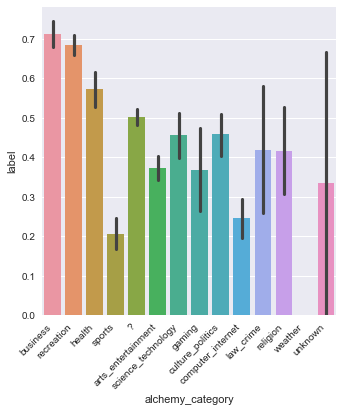

In [4]:
import seaborn as sb
%matplotlib inline 

p=sb.factorplot(kind='bar', x='alchemy_category', y='label', data=data, size=5)
p.set_xticklabels(rotation=45, horizontalalignment='right')

In [40]:
#The chart above shows the mean per category: 
print('mean', data[data.alchemy_category == 'business'].label.mean()) 
#and 1 standard deviation from the mean (black line):
print('std', data[data.alchemy_category == 'business'].label.std())

mean 0.7113636363636363
std 0.4533861521917883


> ### Exercise: 5. How many articles are there per category?

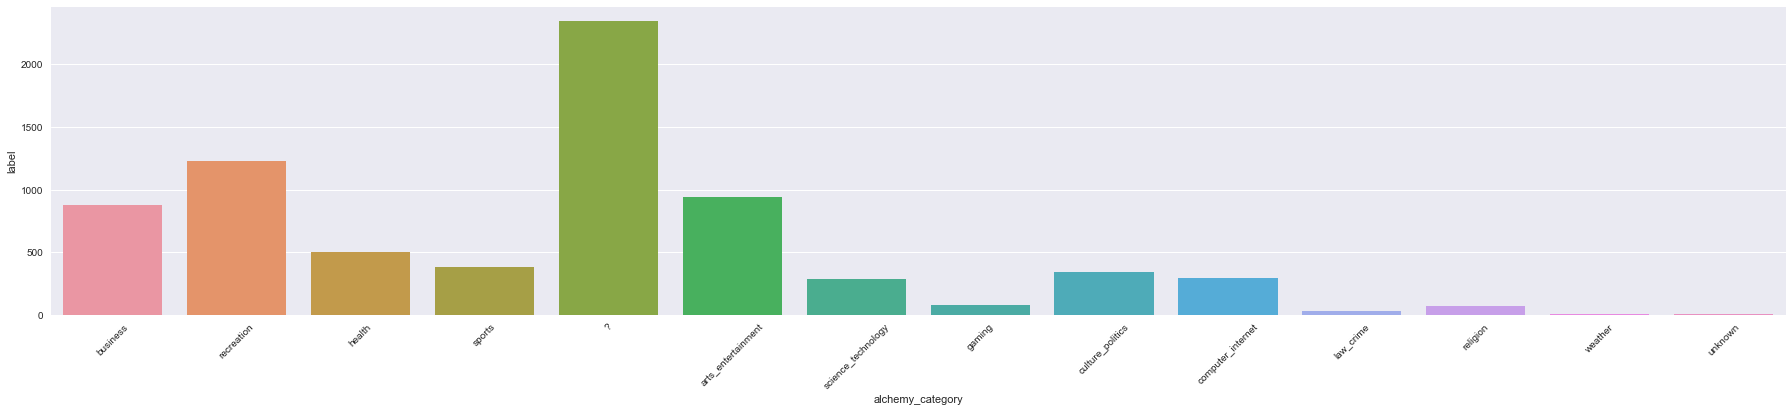

In [29]:
data.groupby(['alchemy_category']) [['label']].count()
#or 
pd.crosstab(data.alchemy_category,'')
#or
p=sb.factorplot(kind='bar', 
              x='alchemy_category', 
              y='label', 
              data=data, 
              estimator=len, # estimator by default is mean, len = 
              aspect =5, # controls width of the viz
              size = 5,# controls height of the viz
              )
p.set_xticklabels(rotation = 45)


> #### Let's try extracting some of the text content.
> ### Exercise: 6. Create a feature for the title containing 'recipe'. 
Is the % of evegreen websites higher or lower on pages that have recipe in the the title?

In [30]:
#Use json to extract the title from the data.boilerplate

#My attempt in pseudo english... 
# data['recipe']= data.title.map(lambda r: 1 if x contains 'recipe' else 0)

#What is the difference between map and apply?


#solution 
data['recipe']= data.title.map(lambda r: 1 if 'recipe' in str(r).lower() else 0)
# or 
data['recipe']= data['title'].str.contains('recipe')

In [40]:
data.recipe[data['recipe']==1].head()

21    1
30    1
33    1
34    1
47    1
Name: recipe, dtype: int64

###  Let's Explore Some Decision Trees

 ### Demo: Build a decision tree model to predict the "evergreeness" of a given website. 

In [49]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(max_depth=5)

X = data[['image_ratio', 'html_ratio',  'label','recipe']].dropna() 
y = X['label']
X.drop('label', axis=1, inplace=True)# drop label, as thats the y outcome, inplace means apply the changes to the dataframe.
    
    
# Fits the model
model.fit(X, y)


<bound method ClassifierMixin.score of DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')>

In [48]:
# Helper function to visualize Decision Trees (creates a file tree.png)

from sklearn.tree import export_graphviz
from os import system 
def build_tree_image(model):
    dotfile = open("tree.dot", 'w') # output a file called tree.dot in active directory 
    export_graphviz(model,
                              out_file = dotfile,
                              feature_names = X.columns)
    dotfile.close()
    system("dot -Tpng tree.dot -o tree.png")# this isn't running from python, it is using graphviz to create a png file.
 
# can run it directly from the command line...
# C:\Users\BeckyC\Desktop\Data Science - GA files>"C:\Program Files (x86)\Graphviz2.38\bin\dot.exe" -Tpng tree.dot -o tree.png
    
build_tree_image(model)

## Decision Trees in scikit-learn

 ### Exercise: Evaluate the decision tree using cross-validation; use AUC as the evaluation metric.

In [51]:
from sklearn.cross_validation import cross_val_score

scores = cross_val_score(model, # set above to be decision tree classifier.
                         X,y, 
                         scoring = 'roc_auc', cv=5)
print('CV AUC {}, Average AUC {}'.format(scores, scores.mean()))

C:\Users\BeckyC\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


CV AUC [ 0.65830318  0.6410564   0.68626848  0.64226413  0.64597661], Average AUC 0.6547737585841423


The above prints the AUC for each fold, and then takes the average...   

Why use CV instead of bootstrapping?

###  Adjusting Decision Trees to Avoid Overfitting

Demo: Control for overfitting in the decision model by adjusting the maximum number of questions (max_depth) or the minimum number of records in each final node (min_samples_leaf)

In [60]:
model = DecisionTreeClassifier( # the two parameters below protect against overfitting.
                max_depth = 2, 
                min_samples_leaf = 5) # min samples per leaf, i.e. there must be at last 5 observations at the final node.

model.fit(X, y)
features = X.columns
scores = cross_val_score(model, X,y, scoring='roc_auc', cv=5)
print('AUC', scores, scores.mean())


print(features, model.feature_importances_) # see below for tidier way of displaying this by converting to df 

build_tree_image(model)

AUC [ 0.63031707  0.62042161  0.65810826  0.63402503  0.63001149] 0.634576690979
Index(['image_ratio', 'html_ratio', 'recipe'], dtype='object') [ 0.13462745  0.00603488  0.85933767]


Limiting the tree to 2 nodes reduces the accuracy of the model from 0.654 to 0.634- this is not necessarily a bad thing as the new model may perform better on unseen data.  
Recipe is the best feature, then image ratio, then html ratio.

In [53]:
len(X)

7395

 ### Demo: Build a "random forest" model to predict the evergreeness of a website. 

In [64]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators = 20, # Number of trees 
                               oob_score=True) 
    
model.fit(X, y)

C:\Users\BeckyC\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\BeckyC\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=20, n_jobs=1, oob_score=True, random_state=None,
            verbose=0, warm_start=False)

### Demo: Extracting importance of features

In [65]:
features = X.columns
feature_importances = model.feature_importances_

features_df = pd.DataFrame({'Features': features, 'Importance Score': feature_importances})
features_df.sort('Importance Score', inplace=True, ascending=False)

features_df.head()

C:\Users\BeckyC\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,Features,Importance Score
1,html_ratio,0.500687
0,image_ratio,0.410546
2,recipe,0.088766


 ### Exercise: Evaluate the Random Forest model using cross-validation; increase the number of estimators and view how that improves predictive performance.

In [103]:
from sklearn.cross_validation import cross_val_score

for n_trees in range(1, 100, 10):
    model = RandomForestClassifier(n_estimators = n_trees) # Number of trees to build
    scores = cross_val_score(model, X, y, scoring='roc_auc')
    print('n trees: {}, CV AUC {}, Average AUC {}'.format(n_trees, scores, scores.mean()))

CV AUC [ 0.60982557  0.63742918  0.62736338], Average AUC 0.6248727105840128
n trees: 1, CV AUC [ 0.54824052  0.57670949  0.57004388], Average AUC 0.5649979615456729
n trees: 11, CV AUC [ 0.60068556  0.63259387  0.62140486], Average AUC 0.6182280971624499
n trees: 21, CV AUC [ 0.6201876   0.6375863   0.62269546], Average AUC 0.6268231191567081
n trees: 31, CV AUC [ 0.61385433  0.63283794  0.6258473 ], Average AUC 0.6241798576269696
n trees: 41, CV AUC [ 0.61949974  0.639389    0.62869025], Average AUC 0.6291929937366981
n trees: 51, CV AUC [ 0.6171327   0.6377948   0.62984734], Average AUC 0.6282582779181001
n trees: 61, CV AUC [ 0.61847848  0.63649934  0.62985492], Average AUC 0.6282775784588152
n trees: 71, CV AUC [ 0.61585308  0.63854776  0.63315411], Average AUC 0.629184983806165
n trees: 81, CV AUC [ 0.61436085  0.6423386   0.63266194], Average AUC 0.6297871287506395
n trees: 91, CV AUC [ 0.61471564  0.64231291  0.63106904], Average AUC 0.6293658637609809


81 trees results in the highest AUC

##  Independent Practice: Evaluate Random Forest Using Cross-Validation

1. Continue adding input variables to the model that you think may be relevant
2. For each feature:
  - Evaluate the model for improved predictive performance using cross-validation
  - Evaluate the _importance_ of the feature
  - 
3. **Bonus**: Just like the 'recipe' feature, add in similar text features and evaluate their performance.


In [102]:
features = X.columns
feature_importances = model.feature_importances_

features_df = pd.DataFrame({'Features': features, 'Importance Score': feature_importances})
features_df.sort('Importance Score', inplace=True, ascending=False)
features_df

print('AUC', scores, scores.mean())
# print ('attributes of the model', 
#        model.base_estimator_,
#        model.classes_,
#        model.estimators_,
#        model.feature_importances_,
#        model.n_outputs_,
#        model.n_features_,
#        model.oob_score_) 

AUC [ 0.6157712   0.61240942  0.65696915  0.62737978  0.62576481] 0.627658871406


C:\Users\BeckyC\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


In [89]:
data.dtypes
data.alchemy_category_score.head()

## Seems that the random forest model can't deal with objects/ strings 

# And struggling to convert them below.. 
# data['alchemy_category_score'] = data.alchemy_category_score.astype(float)
# data['is_news']=data.is_news.astype(int)

0    0.789131
1    0.574147
2    0.996526
3    0.801248
4    0.719157
Name: alchemy_category_score, dtype: object

In [90]:

#extending the model to all features in the data frame.
#'alchemy_category', 'is_news'
X = data[['image_ratio', 'html_ratio',  'label','recipe']].dropna() 
y = X['label']
X.drop('label', axis=1, inplace=True)# drop label, as thats the y outcome, inplace means apply the changes to the dataframe.

In [101]:
#Cross validation
scores = cross_val_score(model, X, y,  scoring ='roc_auc', cv=5)

C:\Users\BeckyC\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\BeckyC\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
